In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from LogisticRegression import *

In [2]:
csv = np.genfromtxt("e4.csv", delimiter=',', skip_header=1, dtype=float)
np.random.shuffle(csv)
train_len = int(csv.shape[0]*0.9)
train_csv = csv[:train_len]
val_csv = csv[train_len:]

t_data = train_csv[:,1:-1]
t_label = np.array(train_csv[:,-1]).reshape(len(t_data),1)

v_data = val_csv[:,1:-1]
v_label = np.array(val_csv[:,-1]).reshape(len(v_data),1)

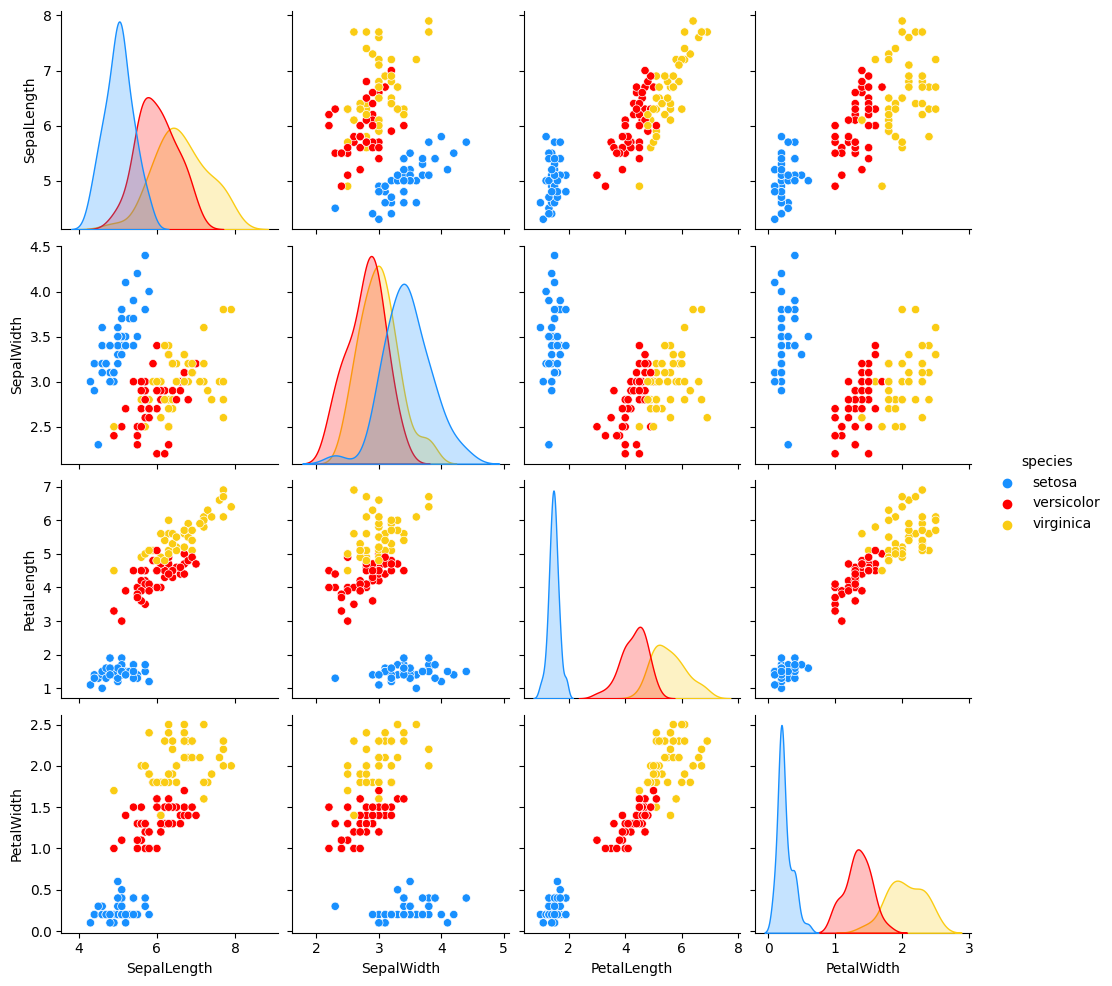

In [3]:
iris_data = t_data

columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
iris_data = pd.DataFrame(t_data, columns=columns)

species_names = ['setosa', 'versicolor', 'virginica']
iris_data['species'] = pd.Categorical.from_codes(t_label.flatten().astype(int), categories=species_names)

antV = ['#1890FF', 'red', '#FACC14'] 
sns.pairplot(data=iris_data, palette=antV, hue= 'species')

plt.show()

In [8]:
lr = LogisticRegression(t_data,t_label,"softmax",2)
lr.train(0.1,10000)
score = lr.score(v_data,v_label)
print(f"score:{score}")

score:1.0


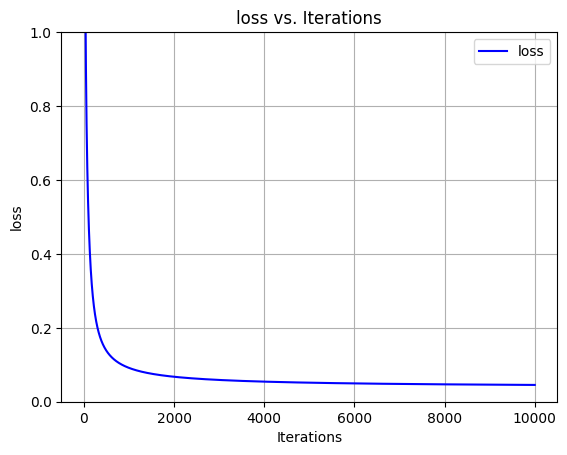

In [9]:
plt.plot(range(len(lr.loss)), lr.loss, label='loss', color='blue')
plt.title('loss vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('loss')
plt.legend()
plt.ylim(0,1)
plt.grid(True) 
plt.show()


In [10]:
np.argmax(lr.predict(np.array([[5.4,3.7,1.5,0.2]])),axis=1)[0]

0

In [9]:
lr.save_model("e4.npz")

In [3]:
lr = LogisticRegression(None,None)
lr.load_model("e4.npz")